<a href="https://colab.research.google.com/github/Mirai-Kuma/DSProject/blob/master/Tourism_YOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import folium
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [67]:
tour = pd.read_csv('tourism_dataset.csv')

In [68]:
tour = tour.reset_index().rename(columns = {'index':'ID'})
tour['Country'] = tour['Country'].replace('USA', 'United States of America')
tour

,ID,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,1,aHKUXhjzTo,United States of America,Historical,813627,2.01,802625.60,No
2,2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No
...,...,...,...,...,...,...,...,...
5984,5984,xAzwnVKAqz,United States of America,Urban,828137,1.97,132848.78,No
5985,5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,Yes
5986,5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,No
5987,5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,Yes


Text(0, 0.5, 'Frequency')

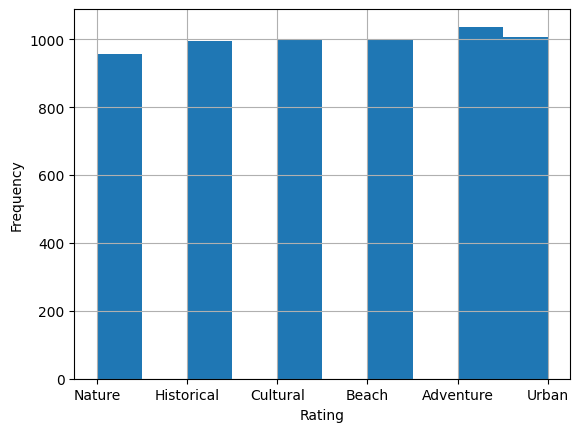

In [69]:
tour['Category'].hist()

plt.xlabel("Rating")
plt.ylabel("Frequency")

<Axes: title={'center': 'Country and Revenue'}, xlabel='Country'>

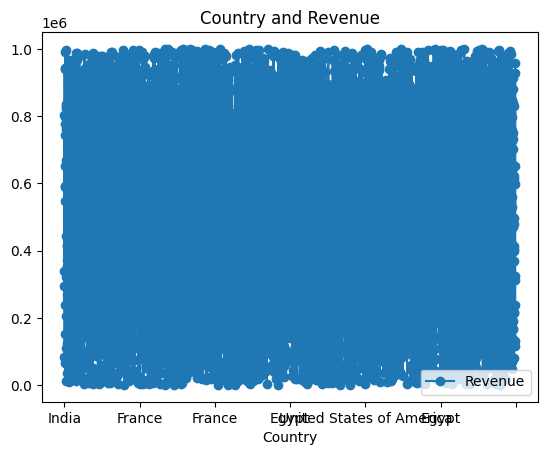

In [70]:
tour.plot(x='Country', y='Revenue', kind='line', marker='o', title='Country and Revenue')

<Axes: title={'center': 'Country and Revenue'}, xlabel='Country'>

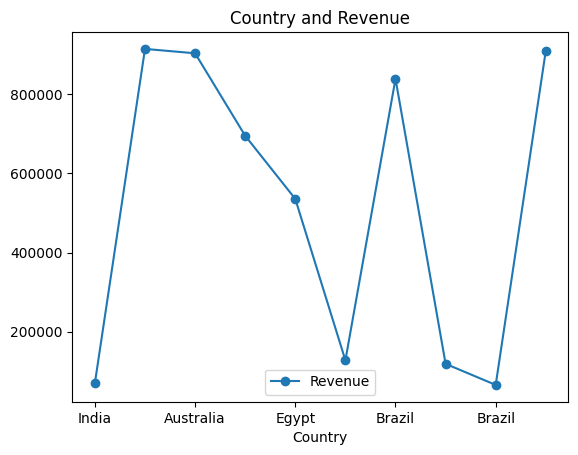

In [71]:
tour.sample(n=10).plot(x='Country', y='Revenue', kind='line', marker='o', title='Country and Revenue')

<Axes: title={'center': 'Rating and Revenue'}, xlabel='Rating', ylabel='Revenue'>

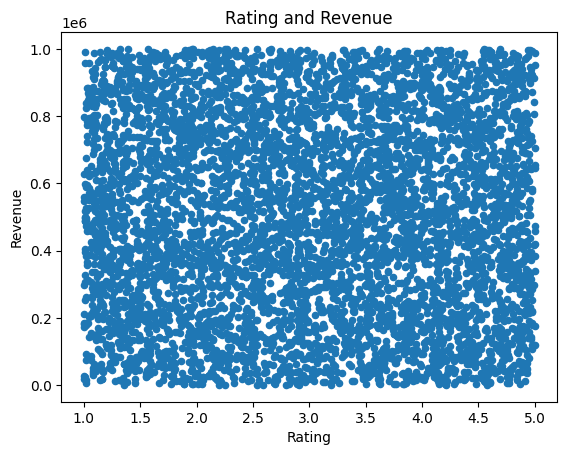

In [72]:
# g = tour.groupby('Country').apply(lambda x: x.sample(n=3, replace=False)).reset_index(drop=True)
# g = tour.sample(n=20)
tour.plot(x='Rating', y='Revenue', kind='scatter', title='Rating and Revenue')

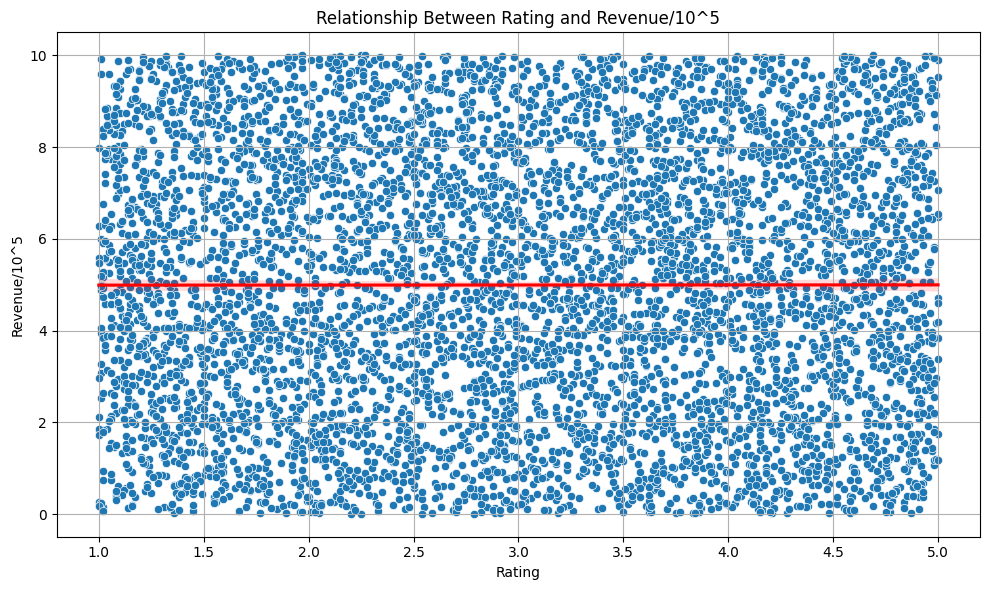

In [73]:
# สร้างกราฟ scatter plot

tour['Revenue/10^5'] = tour['Revenue'].apply(lambda x: x/100000)
tour['Visitors/10^5'] = tour['Visitors'].apply(lambda x: x/100000)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tour, x='Rating', y='Revenue/10^5', marker='o')

# เพิ่มเส้นแนวโน้ม
sns.regplot(data=tour, x='Rating', y='Revenue/10^5', scatter=False, color='red')

plt.title('Relationship Between Rating and Revenue/10^5')
plt.xlabel('Rating')
plt.ylabel('Revenue/10^5')
plt.grid()
plt.tight_layout()
plt.show()

In [74]:
tour[['Revenue', 'Rating']].corr()

,Revenue,Rating
Revenue,1.000000,0.000574
Rating,0.000574,1.000000


In [75]:
stats.chi2_contingency(pd.crosstab(tour['Country'], tour['Category']))

Chi2ContingencyResult(statistic=26.552548090444382, pvalue=0.6466555784977197, dof=30, expected_freq=array([[143.71514443, 138.31023543, 138.31023543, 137.75588579,
        132.4895642 , 139.41893471],
       [145.4466522 , 139.97662381, 139.97662381, 139.41559526,
        134.08582401, 141.09868092],
       [139.5595258 , 134.31090332, 134.31090332, 133.77258307,
        128.65854066, 135.38754383],
       [157.9135081 , 151.97462014, 151.97462014, 151.36550342,
        145.57889464, 153.19285356],
       [148.39021539, 142.80948405, 142.80948405, 142.23710135,
        136.79946569, 143.95424946],
       [155.14309568, 149.30839873, 149.30839873, 148.70996828,
        143.02487894, 150.50525964],
       [146.83185841, 141.30973451, 141.30973451, 140.74336283,
        135.36283186, 142.44247788]]))

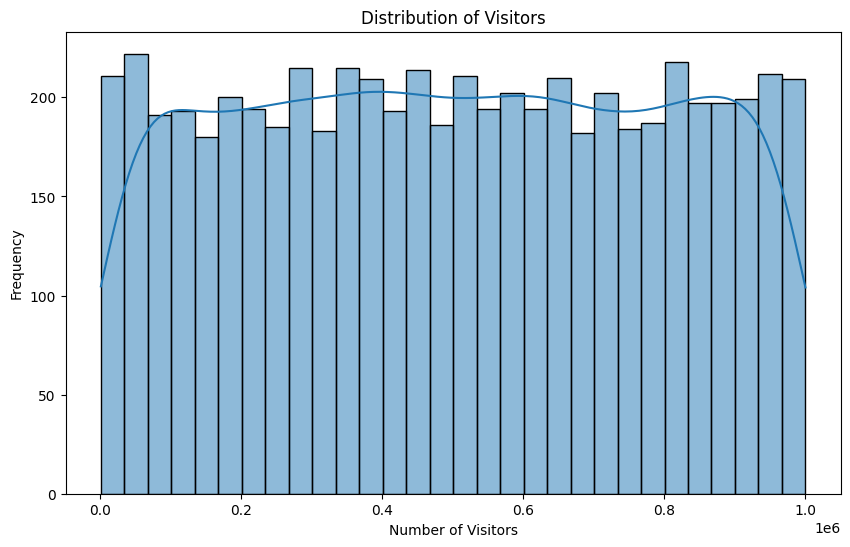

In [76]:
# ตัวอย่างการสร้าง histogram ของจำนวนผู้เข้าชม
plt.figure(figsize=(10, 6))
sns.histplot(tour['Visitors'], bins=30, kde=True)
plt.title('Distribution of Visitors')
plt.xlabel('Number of Visitors')
plt.ylabel('Frequency')
plt.show()

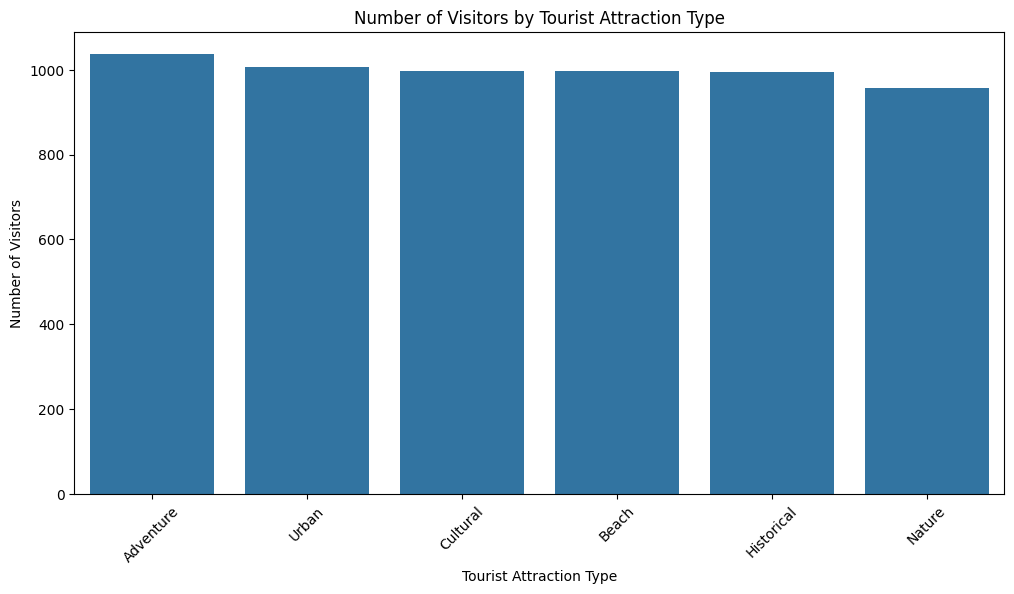

In [77]:
# สร้างกราฟแท่งสำหรับจำนวนผู้เข้าชมตามประเภทสถานที่
plt.figure(figsize=(12, 6))
sns.countplot(data=tour, x='Category', order=tour['Category'].value_counts().index)
plt.title('Number of Visitors by Tourist Attraction Type')
plt.xlabel('Tourist Attraction Type')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.show()

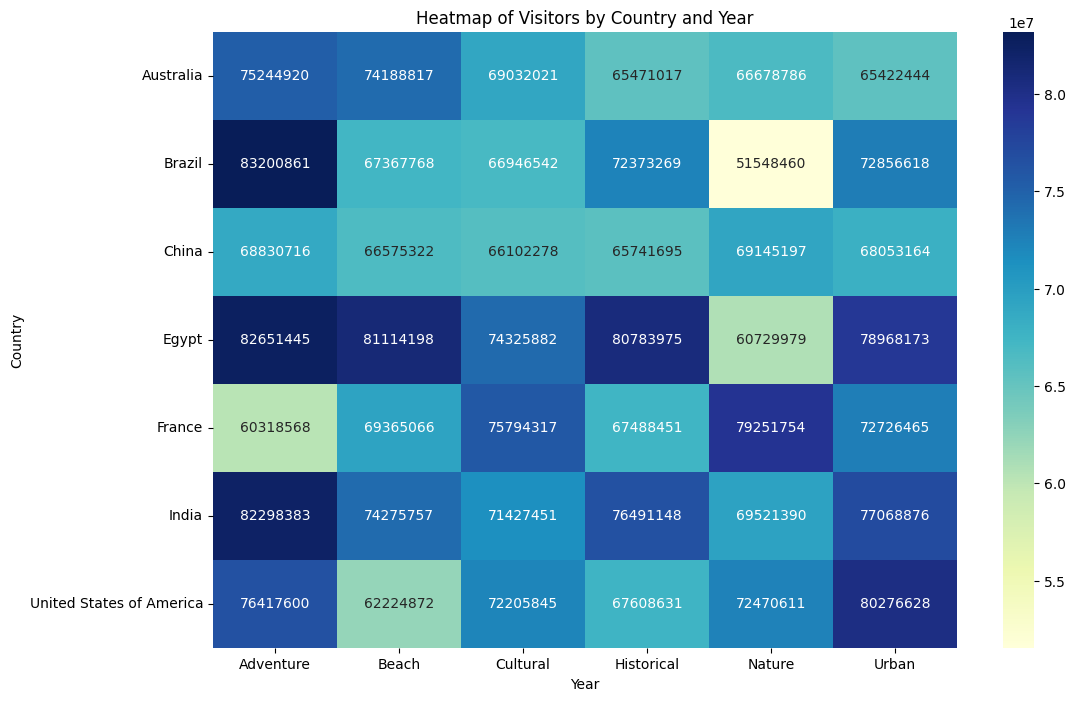

In [78]:
pivot_table = tour.pivot_table(values='Visitors', index='Country', columns='Category', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Visitors by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

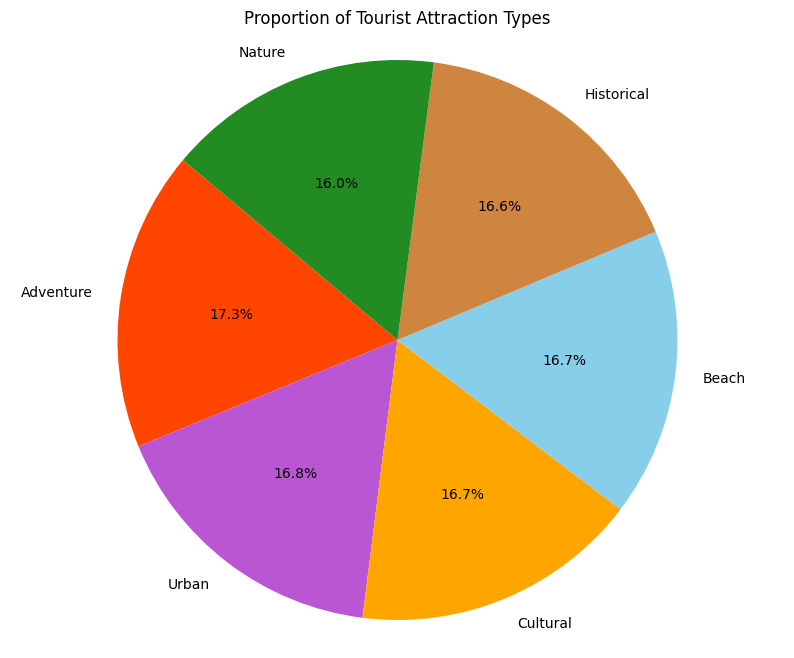

In [79]:
# สร้าง DataFrame สำหรับสัดส่วนของประเภทสถานที่ท่องเที่ยว
attraction_counts = tour['Category'].value_counts()

# กำหนดสีสำหรับ Pie Chart
colors = ['#FF4500', '#BA55D3', '#FFA500', '#87CEEB', '#CD853F', '#228B22']

# สร้าง Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(attraction_counts, labels=attraction_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proportion of Tourist Attraction Types')
plt.axis('equal')  # ทำให้ Pie Chart เป็นวงกลม
plt.show()

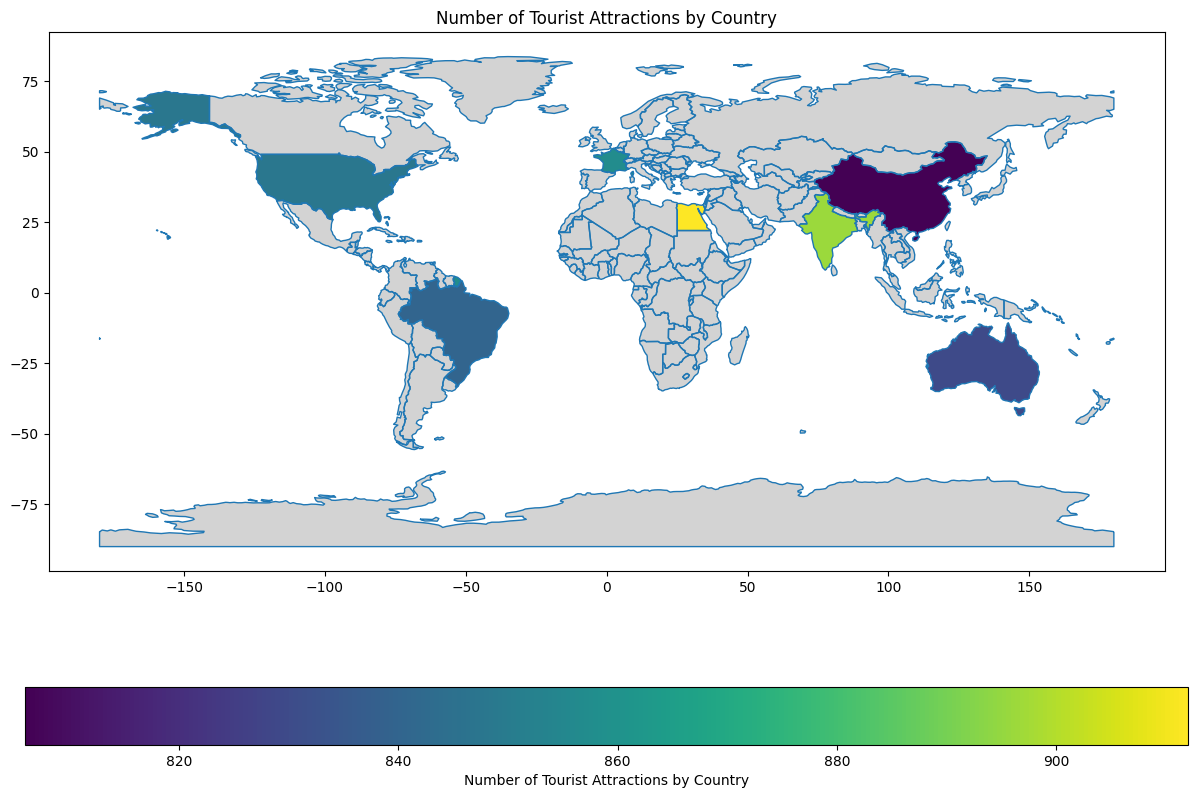

In [80]:
# นับจำนวนสถานที่ท่องเที่ยวตามประเทศ
country_counts = tour['Country'].value_counts()

# โหลดข้อมูลแผนที่โลกจาก Shapefile ที่ดาวน์โหลด
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# สร้าง DataFrame ใหม่สำหรับรวมข้อมูล
country_counts = country_counts.reset_index()
country_counts.columns = ['country', 'count']


# รวมข้อมูลระหว่างแผนที่โลกกับข้อมูลประเทศ
merged = world.set_index('ADMIN').join(country_counts.set_index('country'))

# สร้างแผนที่
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Tourist Attractions by Country",
                         'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey", "label": "Missing data"})
plt.title('Number of Tourist Attractions by Country')
plt.show()

In [81]:
world['ADMIN'].apply

<bound method Series.apply of 0                             Fiji
1      United Republic of Tanzania
2                   Western Sahara
3                           Canada
4         United States of America
                  ...             
172             Republic of Serbia
173                     Montenegro
174                         Kosovo
175            Trinidad and Tobago
176                    South Sudan
Name: ADMIN, Length: 177, dtype: object>

ID                         0
Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
Revenue/10^5               0
Visitors/10^5              0
dtype: int64


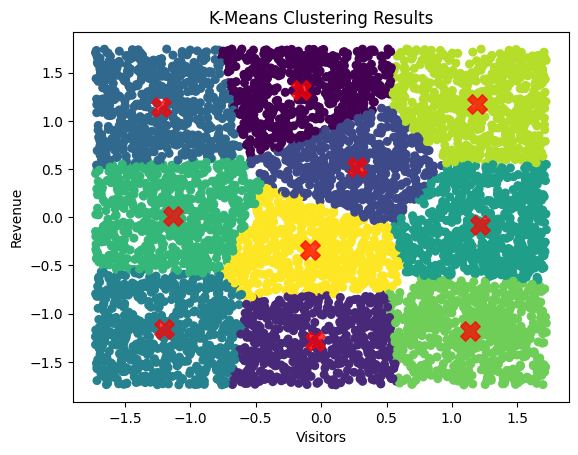

In [82]:
# เลือกฟีเจอร์ที่ต้องการ (เช่น 'feature1', 'feature2')
X = tour[['Visitors', 'Revenue']].values

# ตรวจสอบค่าที่ขาดหาย
print(tour.isnull().sum())

# ทำการปรับขนาดข้อมูล
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# กำหนดจำนวนกลุ่ม (สามารถทดลองค่าอื่นได้)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_scaled)

# รับตำแหน่ง centroid และกลุ่มที่แต่ละจุดข้อมูลถูกจัดกลุ่ม
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# แสดงผลการจัดกลุ่ม
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # แสดง centroid
plt.title("K-Means Clustering Results")
plt.xlabel('Visitors',)
plt.ylabel('Revenue')
plt.show()



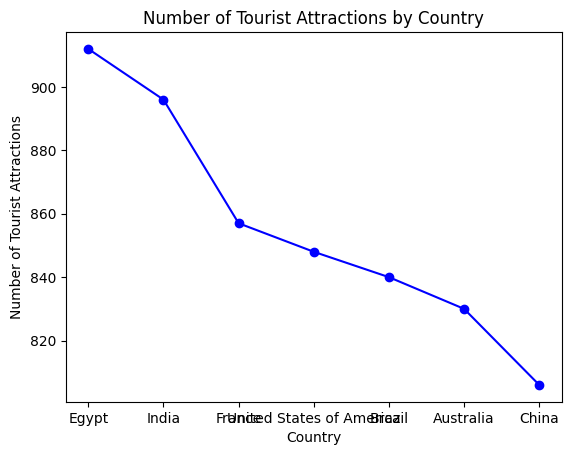

In [83]:
tour['Country'].value_counts()

plt.plot(tour['Country'].value_counts(), color='blue', marker='o')
plt.xlabel('Country')
plt.ylabel('Number of Tourist Attractions')
plt.title('Number of Tourist Attractions by Country')
plt.show()

In [85]:
x = tour[['Revenue']]
y = tour['Visitors']

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model
model.fit(x, y)

# Evaluate the model
r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 6.985651041269136e-05


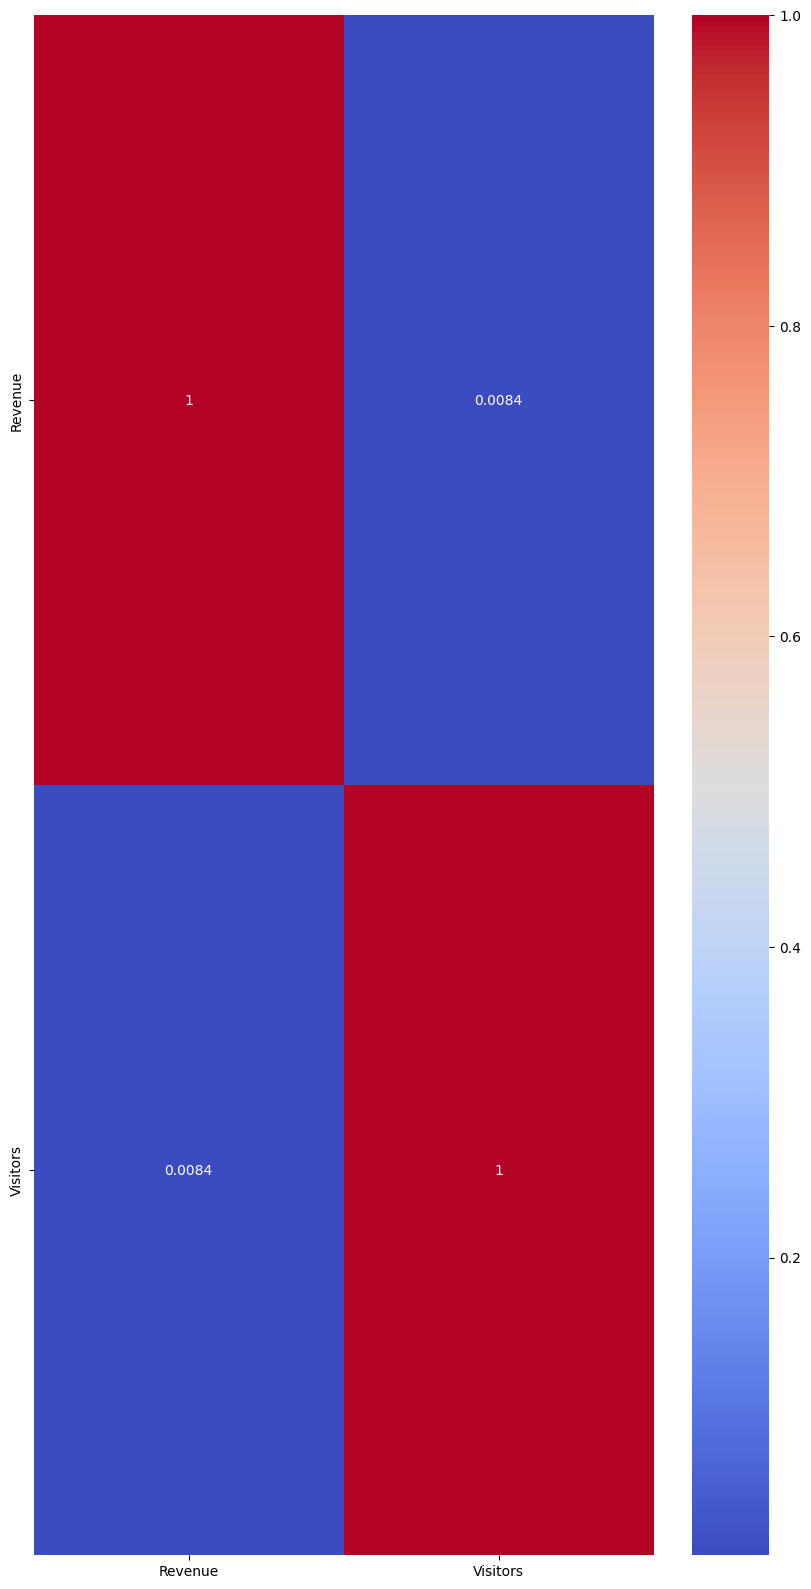

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Accommodation_Available', ylabel='Visitors'>

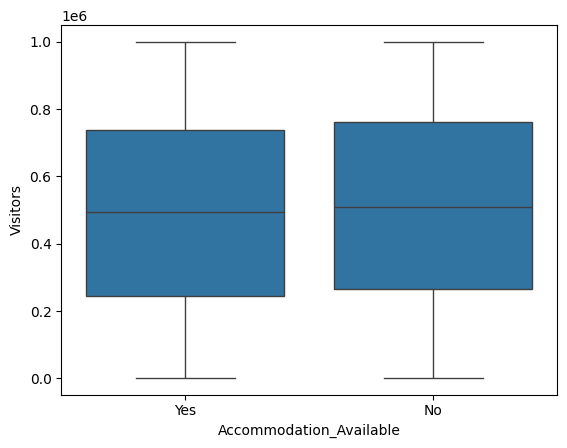

In [98]:
plt.figure(figsize=(10, 20))
sns.boxplot(x='Accommodation_Available', y='Visitors', data=tour)

# plt.scatter(tour['Accommodation_Available'], tour['Visitors'], alpha=0.6)
# plt.plot(tour['Accommodation_Available'], tour['Visitors'])
plt.title('Visitors by Accommodation Available')
plt.xlabel('Accommodation Available')
plt.ylabel('Visitors')
plt.show()

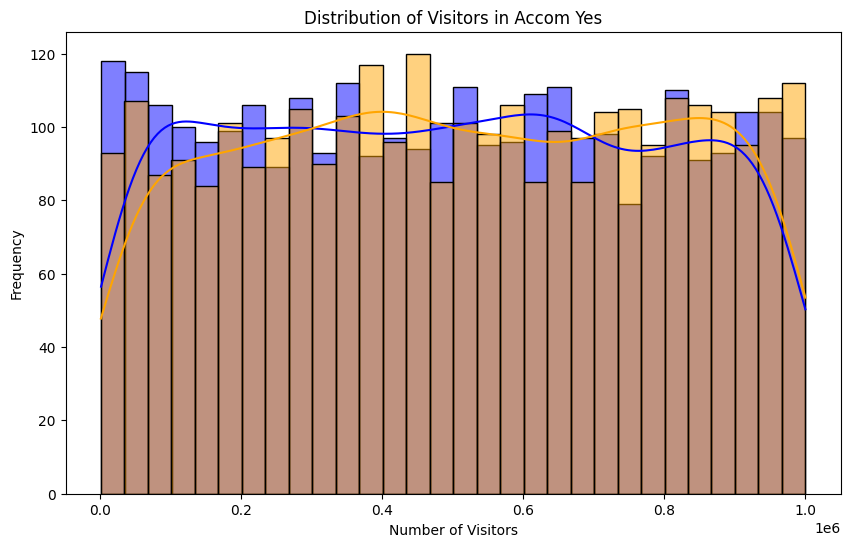

In [113]:
a = tour.groupby('Accommodation_Available')[['Visitors']]
a.describe()
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
# plt.title('Visitors by Accommodation Available')
# plt.xlabel('Accommodation Available')
# plt.ylabel('Visitors')
# ax.plot(a.index, a['Visitors'], marker='o')
# plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(tour[tour['Accommodation_Available']=='Yes']['Visitors'], bins=30, color='blue', kde=True, label='Yes')
sns.histplot(tour[tour['Accommodation_Available']=='No']['Visitors'], bins=30, color='orange', kde=True, label='No')
plt.title('Distribution of Visitors in Accom Yes')
plt.xlabel('Number of Visitors')
plt.ylabel('Frequency')
plt.show()


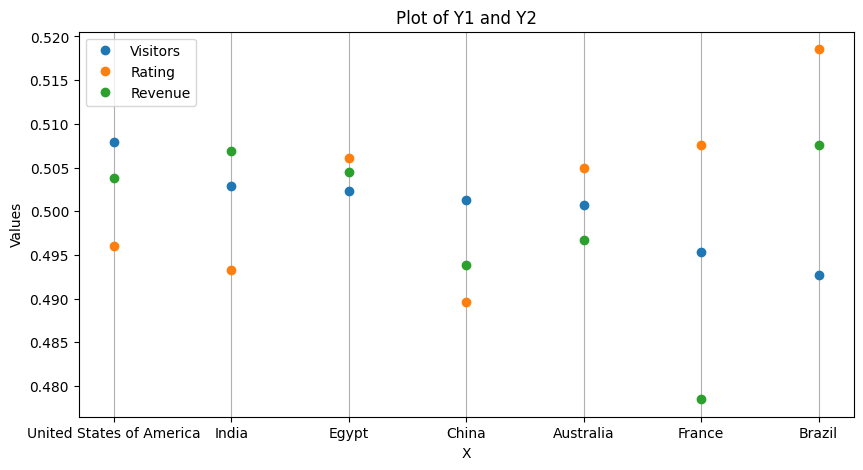

In [141]:
# tour['Visitors/10^5'] = tour['Visitors'].apply(lambda x: x/100000)
# tour['Rating*1.67'] = tour['Rating'].apply(lambda x: x*1.67)

# สร้าง MinMaxScaler
scaler = MinMaxScaler()

# ปรับขนาดข้อมูล
tour['Rating_Scaled'] = pd.DataFrame(scaler.fit_transform(tour[['Rating', 'Visitors', 'Revenue']]), columns=tour[['Rating', 'Visitors', 'Revenue']].columns)['Rating']
tour['Visitors_Scaled'] = pd.DataFrame(scaler.fit_transform(tour[['Rating', 'Visitors', 'Revenue']]), columns=tour[['Rating', 'Visitors', 'Revenue']].columns)['Visitors']
tour['Revenue_Scaled'] = pd.DataFrame(scaler.fit_transform(tour[['Rating', 'Visitors', 'Revenue']]), columns=tour[['Rating', 'Visitors', 'Revenue']].columns)['Revenue']

# # print(df_scaled)
# tour

rating_data = tour.groupby('Country')[['Rating_Scaled']].mean().sort_values(by='Rating_Scaled', ascending=False)
visitor_data = tour.groupby('Country')[['Visitors_Scaled']].mean().sort_values(by='Visitors_Scaled', ascending=False)
revenue_data = tour.groupby('Country')[['Revenue_Scaled']].mean().sort_values(by='Revenue_Scaled', ascending=False)

# visitor_data = visitor_data.reset_index()
# rating_data = rating_data.reset_index()

# visitor_data

plt.figure(figsize=(10, 5))


# Plot สำหรับ Y1
plt.plot(visitor_data.index, visitor_data, label='Visitors', marker='o', linewidth=0)

# Plot สำหรับ Y2
plt.plot(rating_data.index, rating_data, label='Rating', marker='o', linewidth=0)

# Plot สำหรับ Y3
plt.plot(revenue_data.index, revenue_data, label='Revenue', marker='o', linewidth=0)

plt.title('Plot of Y1 and Y2')
plt.xlabel('X')
plt.ylabel('Values')
plt.legend()
plt.grid(axis='x')
plt.show()